In [1]:
import pandas as pd

In [2]:
# Reload the datasets using comma as the delimiter
default_features = pd.read_csv('default_features_1059_tracks.txt', delimiter=',', header=None)
chromatic_features = pd.read_csv('default_plus_chromatic_features_1059_tracks.txt', delimiter=',', header=None)

# Display the first few rows of each dataset and the shape to understand the structure better
(default_features.head(), default_features.shape, chromatic_features.head(), chromatic_features.shape)

(         0         1         2         3         4         5         6   \
 0  7.161286  7.835325  2.911583  0.984049 -1.499546 -2.094097  0.576000   
 1  0.225763 -0.094169 -0.603646  0.497745  0.874036  0.290280 -0.077659   
 2 -0.692525 -0.517801 -0.788035  1.214351 -0.907214  0.880213  0.406899   
 3 -0.735562 -0.684055  2.058215  0.716328 -0.011393  0.805396  1.497982   
 4  0.570272  0.273157 -0.279214  0.083456  1.049331 -0.869295 -0.265858   
 
          7         8         9   ...        60        61        62        63  \
 0 -1.205671  1.849122 -0.425598  ... -1.504263  0.351267 -1.018726 -0.174878   
 1 -0.887385  0.432062 -0.093963  ... -0.495712 -0.465077 -0.157861 -0.157189   
 2 -0.694895 -0.901869 -1.701574  ... -0.637167  0.147260  0.217914  2.718442   
 3  0.114752  0.692847  0.052377  ... -0.178325 -0.065059 -0.724247 -1.020687   
 4 -0.401676 -0.872639  1.147483  ... -0.919463 -0.667912 -0.820172 -0.190488   
 
          64        65        66        67     68     

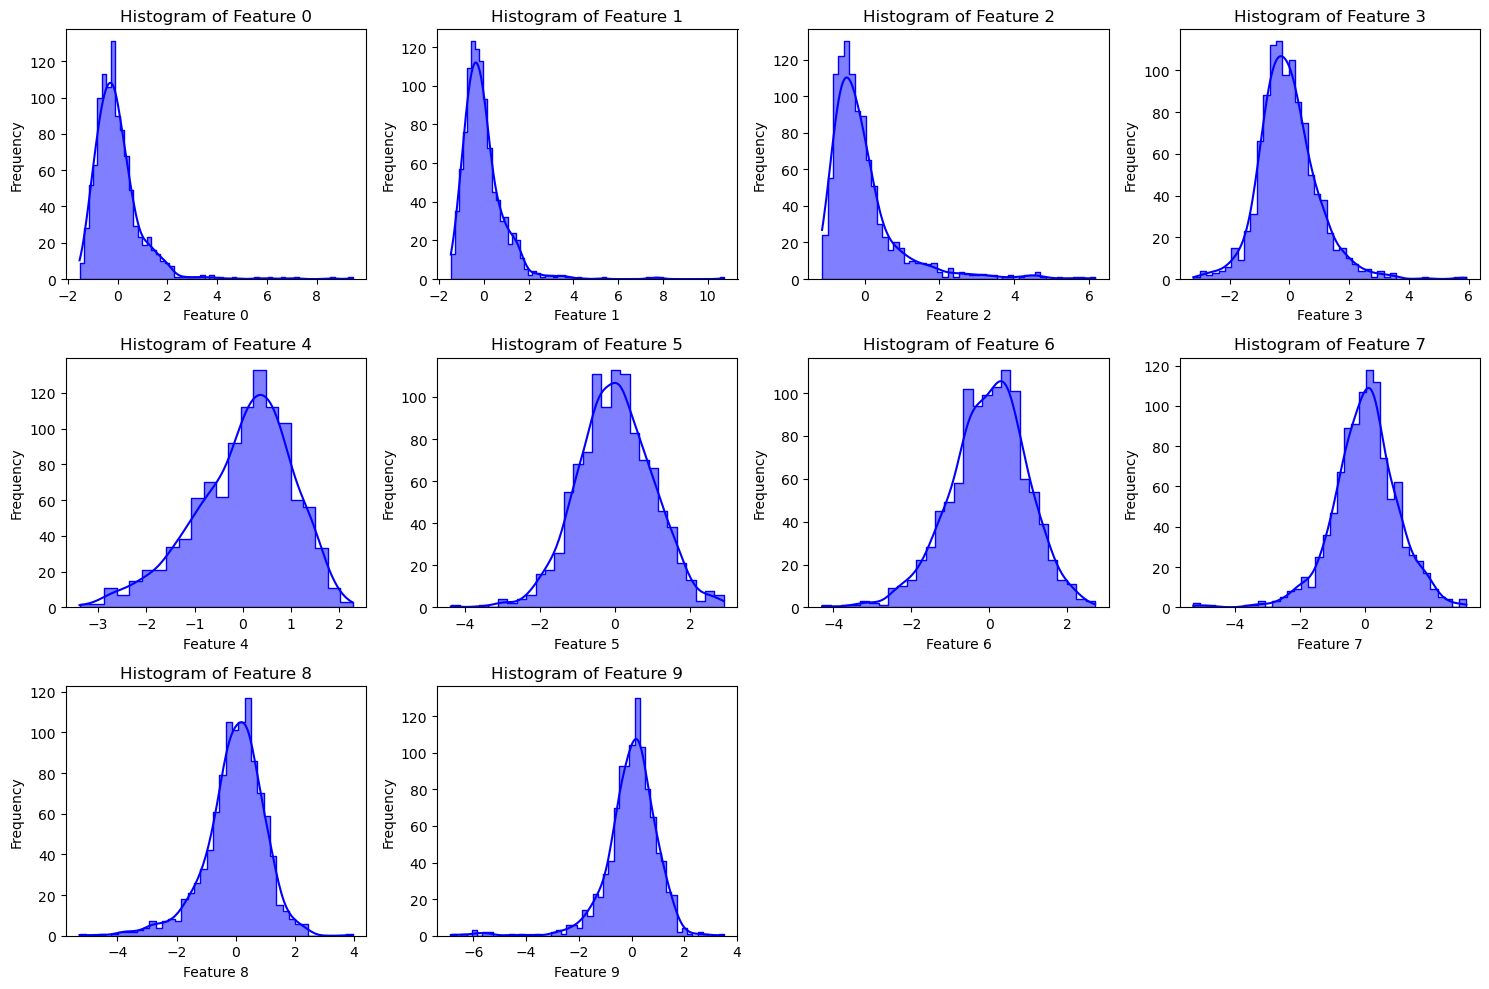

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for histogram plotting to avoid clutter (e.g., first 10 columns)
subset_columns = default_features.columns[:10]

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(subset_columns):
    plt.subplot(3, 4, i+1)  # arrange plots in a 3x4 grid
    sns.histplot(default_features[col], kde=True, element='step', color='blue')
    plt.title(f'Histogram of Feature {col}')
    plt.xlabel(f'Feature {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


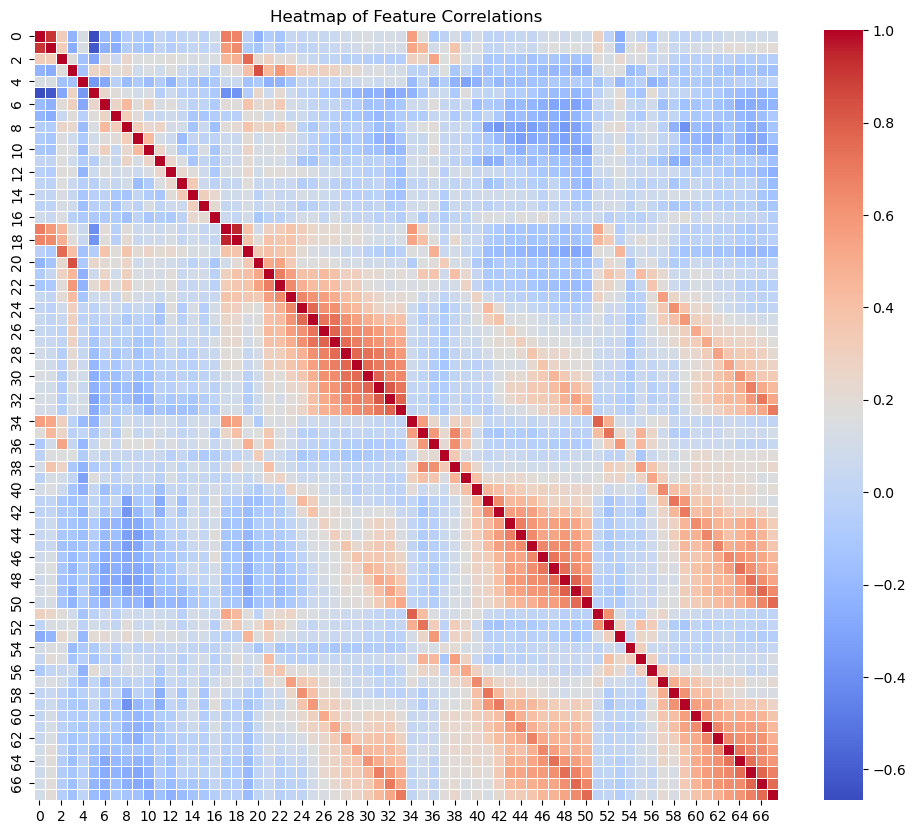

In [4]:
# Calculate the correlation matrix for the features in the default_features dataset
correlation_matrix = default_features.iloc[:, :-2].corr()  # Exclude the last two columns assuming they are targets

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


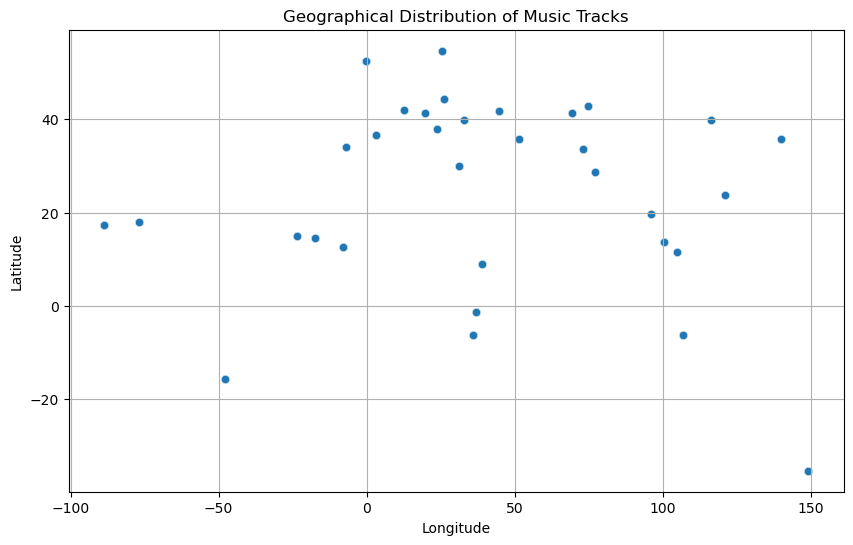

In [5]:
# Assuming the last two columns are latitude and longitude
latitude = default_features.iloc[:, -2]
longitude = default_features.iloc[:, -1]

# Scatter plot of geographical coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(x=longitude, y=latitude, alpha=0.6)
plt.title('Geographical Distribution of Music Tracks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values in both datasets
missing_values_default = default_features.isnull().sum().sum()
missing_values_chromatic = chromatic_features.isnull().sum().sum()

# Data Splitting
# Using default_features for this example; similar steps would apply to chromatic_features
X = default_features.iloc[:, :-2]  # all rows, exclude last two columns (targets)
y = default_features.iloc[:, -2:]  # targets (assuming latitude and longitude)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(missing_values_default, missing_values_chromatic, X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(0, 0, (847, 68), (212, 68), (847, 2), (212, 2))

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(1120.920183251095, 0.207603073369995)

### Classification Task

### Regression Task

In [9]:
# Ensure imports and setup are correct
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Load and prepare the data
data_path = 'default_features_1059_tracks.txt' 
data = pd.read_csv(data_path, delimiter=',')
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train RandomForest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Initialize and train MLPRegressor
model_mlp = MLPRegressor(random_state=42, max_iter=500)
model_mlp.fit(X_train, y_train)

# Define and train a simple TensorFlow neural network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])
model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Function to evaluate models
def evaluate_regression_model(model, X_test, y_test, model_name='Model'):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"{model_name} Performance:")
    print("----------------------------")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}\n")

# Evaluate each model
evaluate_regression_model(model_rf, X_test, y_test, model_name='RandomForestRegressor')
evaluate_regression_model(model_nn, X_test, y_test, model_name='TensorFlow Neural Network')
evaluate_regression_model(model_mlp, X_test, y_test, model_name='MLPRegressor')


C:\Users\dell\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(





RandomForestRegressor Performance:
----------------------------
Mean Squared Error: 1080.88
Root Mean Squared Error: 30.09
Mean Absolute Error: 23.10
R-squared: 0.23

7/7 [==============================] - 0s 5ms/step
TensorFlow Neural Network Performance:
----------------------------
Mean Squared Error: 1158.08
Root Mean Squared Error: 30.98
Mean Absolute Error: 23.63
R-squared: 0.19

MLPRegressor Performance:
----------------------------
Mean Squared Error: 1117.33
Root Mean Squared Error: 30.27
Mean Absolute Error: 23.21
R-squared: 0.24



In [10]:

best_model_predictions = model_rf.predict(X_test)

# Print the predictions of the best performing model
print("RandomForestRegressor Predictions:")
for i, prediction in enumerate(best_model_predictions):
    print(f"Sample {i}: Predicted Latitude = {prediction[0]}, Predicted Longitude = {prediction[1]}")


RandomForestRegressor Predictions:
Sample 0: Predicted Latitude = 25.630699999999997, Predicted Longitude = 67.81999999999995
Sample 1: Predicted Latitude = 34.047799999999995, Predicted Longitude = 37.69229999999999
Sample 2: Predicted Latitude = 49.333400000000005, Predicted Longitude = 6.324499999999998
Sample 3: Predicted Latitude = 36.593400000000024, Predicted Longitude = 46.06859999999999
Sample 4: Predicted Latitude = 44.8226, Predicted Longitude = 8.794899999999995
Sample 5: Predicted Latitude = 23.805, Predicted Longitude = 52.89789999999997
Sample 6: Predicted Latitude = 17.49340000000001, Predicted Longitude = -16.3042
Sample 7: Predicted Latitude = 46.32619999999999, Predicted Longitude = 10.108599999999996
Sample 8: Predicted Latitude = 23.366699999999994, Predicted Longitude = 37.8619
Sample 9: Predicted Latitude = 35.8223, Predicted Longitude = 35.270499999999984
Sample 10: Predicted Latitude = 26.5346, Predicted Longitude = 46.17659999999997
Sample 11: Predicted Latitu